In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from skimpy import skim
import numpy as np

In [2]:
df=pd.read_csv("data.txt", sep=",")

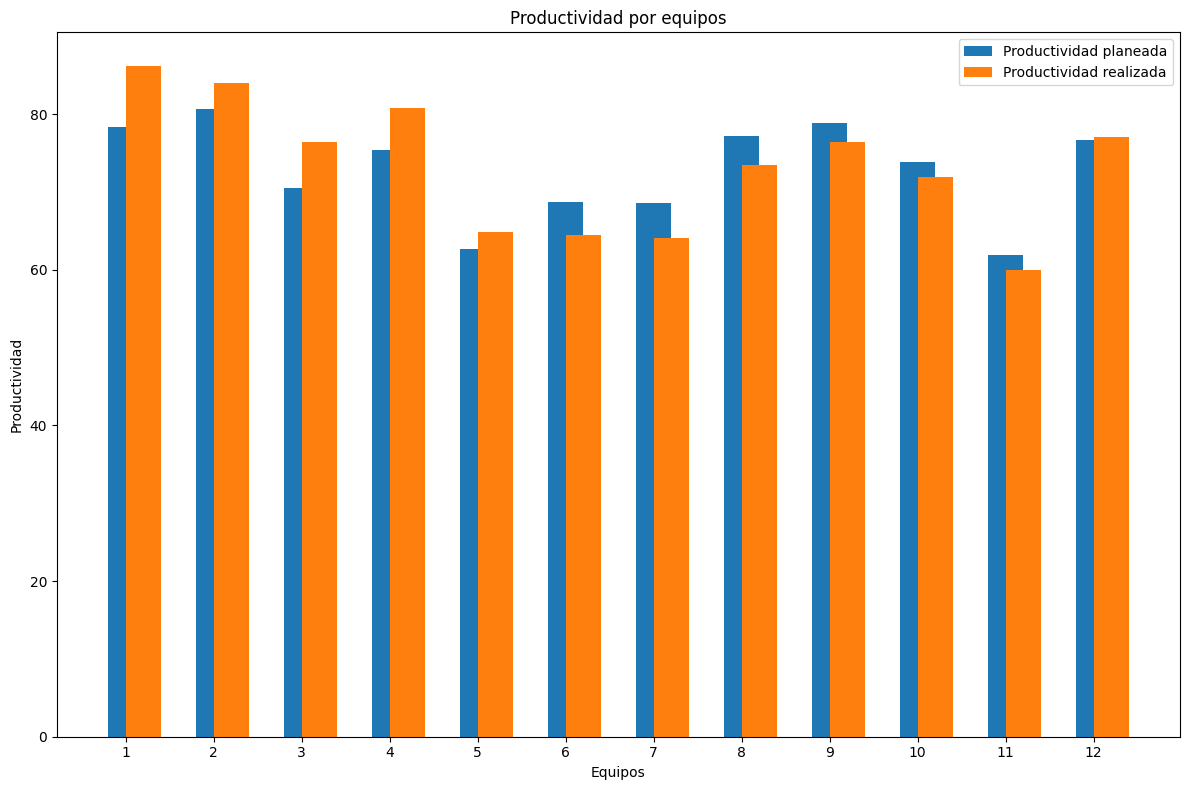

In [4]:
# Agrupar los datos por 'team' y sumar los valores de las columnas numéricas
resultado_suma = df.groupby('team').sum()

# Resetear el índice para que 'team' vuelva a ser una columna y no el índice del DataFrame
resultado_suma.reset_index(inplace=True)


# Calcular la productividad planificada y ejecutada
# La productividad planificada podría ser la suma de 'targeted_productivity'
# La productividad ejecutada es la suma de 'actual_productivity'
# Estos cálculos ya se hicieron en el paso de agrupación anterior

# Para este gráfico, necesitamos dos series de datos: planned_productivity y executed_productivity
planned_productivity = resultado_suma['targeted_productivity']
executed_productivity = resultado_suma['actual_productivity']

# Configurar los datos para el gráfico
teams = resultado_suma['team']
x = range(len(teams))  # Las posiciones X para los grupos de barras

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))

# Configurar las barras para la productividad planificada y ejecutada
plt.bar(x, planned_productivity, width=0.4, label='Productividad planeada', align='center')
plt.bar(x, executed_productivity, width=0.4, label='Productividad realizada', align='edge')

# Añadir etiquetas y título
plt.xlabel('Equipos')
plt.ylabel('Productividad')
plt.title('Productividad por equipos')
plt.xticks(x, teams)  # Etiquetar el eje x con los nombres de los equipos
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()



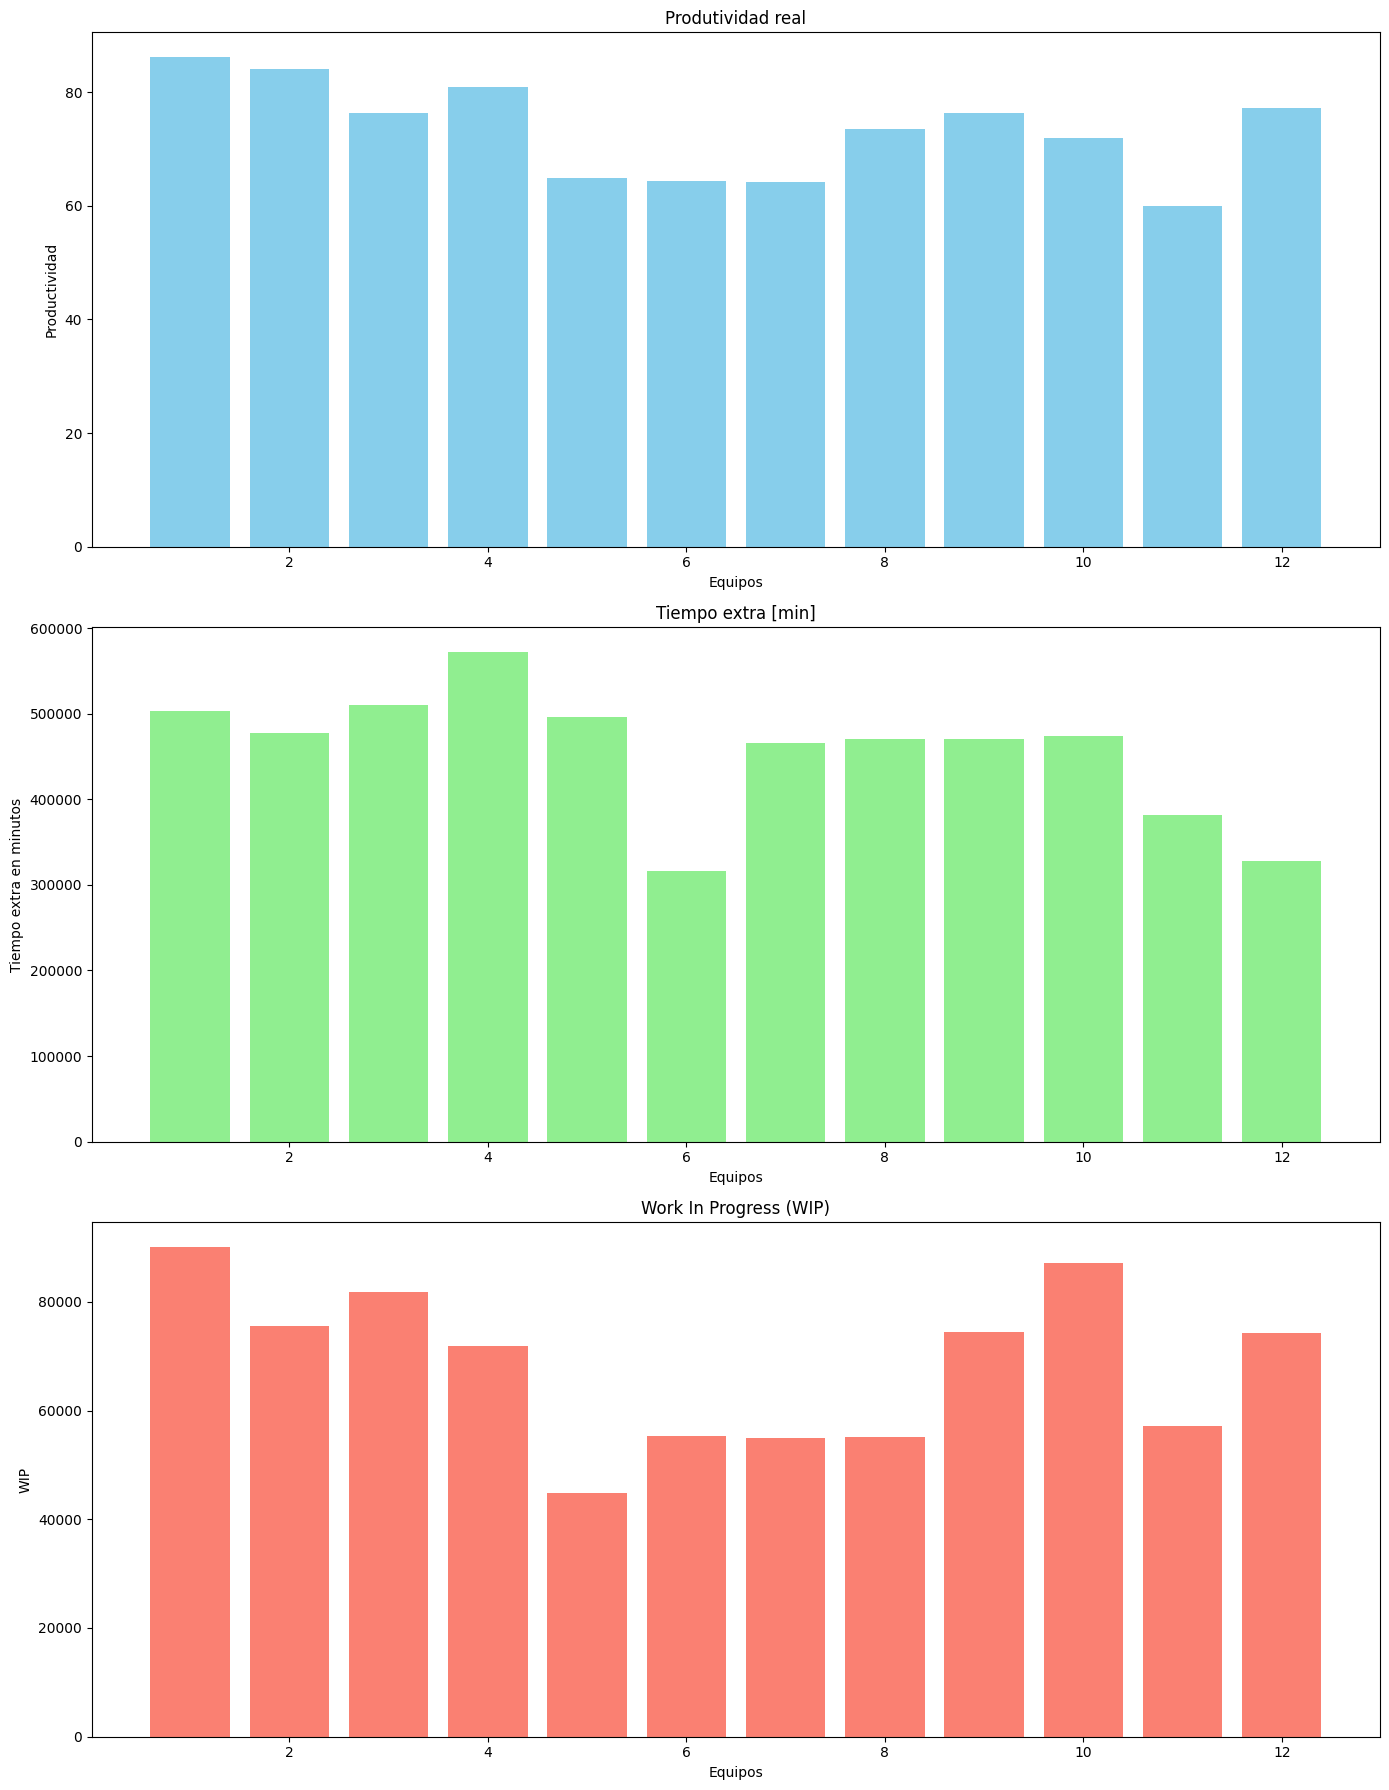

In [6]:
# Para mostrar la información para todos los equipos, utilizaremos el DataFrame 'resultado_suma' completo

# Crear la visualización para todos los equipos
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# Productividad ejecutada para todos los equipos
axs[0].bar(resultado_suma['team'], resultado_suma['actual_productivity'], color='skyblue')
axs[0].set_title('Produtividad real')
axs[0].set_xlabel('Equipos')
axs[0].set_ylabel('Productividad')

# Tiempo de producción para todos los equipos
axs[1].bar(resultado_suma['team'], resultado_suma['over_time'], color='lightgreen')
axs[1].set_title('Tiempo extra [min]')
axs[1].set_xlabel('Equipos')
axs[1].set_ylabel('Tiempo extra en minutos')

# Trabajo en progreso (WIP) para todos los equipos
axs[2].bar(resultado_suma['team'], resultado_suma['wip'], color='salmon')
axs[2].set_title('Work In Progress (WIP)')
axs[2].set_xlabel('Equipos')
axs[2].set_ylabel('WIP')

plt.tight_layout()
plt.show()


<Axes: >

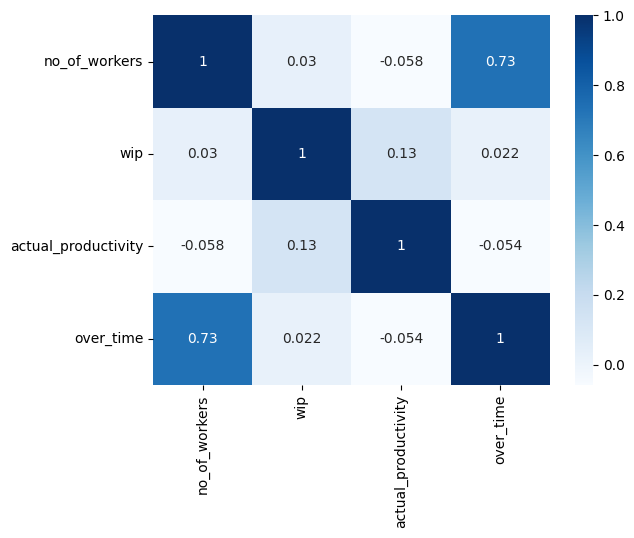

In [9]:
# Calcular correlaciones
correlaciones = df[['no_of_workers', 'wip', 'actual_productivity', 'over_time']].corr()
sns.heatmap(correlaciones, cmap="Blues", annot=True)



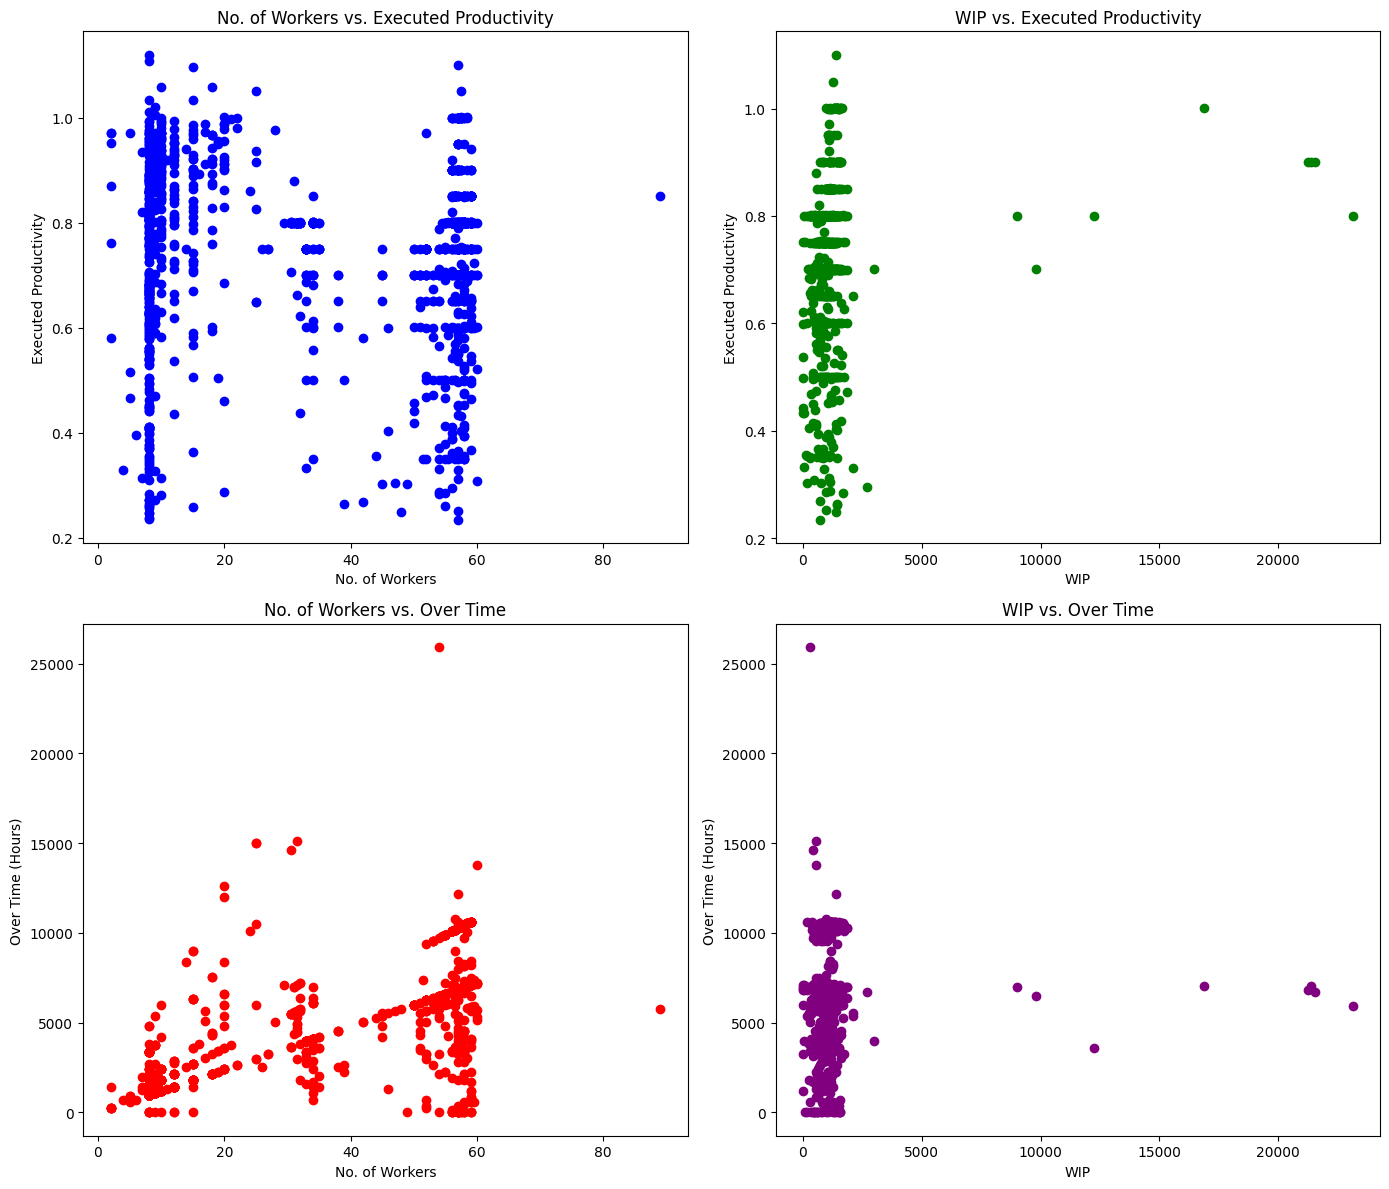

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Gráfico de dispersión para número de miembros vs. productividad ejecutada
axs[0, 0].scatter(df['no_of_workers'], df['actual_productivity'], color='blue')
axs[0, 0].set_title('No. of Workers vs. Executed Productivity')
axs[0, 0].set_xlabel('No. of Workers')
axs[0, 0].set_ylabel('Executed Productivity')

# Gráfico de dispersión para WIP vs. productividad ejecutada
axs[0, 1].scatter(df['wip'], df['actual_productivity'], color='green')
axs[0, 1].set_title('WIP vs. Executed Productivity')
axs[0, 1].set_xlabel('WIP')
axs[0, 1].set_ylabel('Executed Productivity')

# Gráfico de dispersión para número de miembros vs. tiempo de producción
axs[1, 0].scatter(df['no_of_workers'], df['over_time'], color='red')
axs[1, 0].set_title('No. of Workers vs. Over Time')
axs[1, 0].set_xlabel('No. of Workers')
axs[1, 0].set_ylabel('Over Time (Hours)')

# Gráfico de dispersión para WIP vs. tiempo de producción
axs[1, 1].scatter(df['wip'], df['over_time'], color='purple')
axs[1, 1].set_title('WIP vs. Over Time')
axs[1, 1].set_xlabel('WIP')
axs[1, 1].set_ylabel('Over Time (Hours)')

plt.tight_layout()
plt.show()


In [12]:
# Calcular correlaciones específicas para incentivo con productividad ejecutada y tiempo de producción
correlacion_incentivo_productividad = resultado_suma[['incentive', 'actual_productivity']].corr()
correlacion_incentivo_overtime = resultado_suma[['incentive', 'over_time']].corr()

# Mostrar las correlaciones calculadas
correlacion_incentivo_productividad, correlacion_incentivo_overtime


(                     incentive  actual_productivity
 incentive             1.000000             0.531121
 actual_productivity   0.531121             1.000000,
            incentive  over_time
 incentive   1.000000   0.322578
 over_time   0.322578   1.000000)

<Axes: >

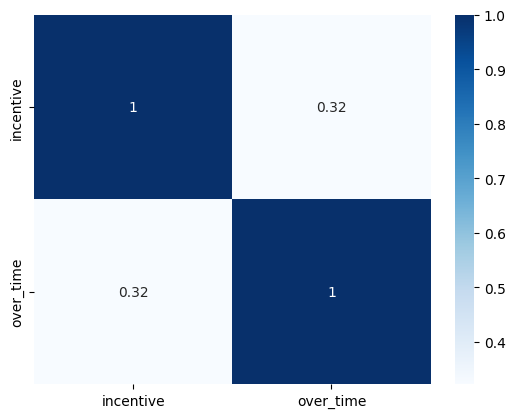

In [13]:
sns.heatmap(correlacion_incentivo_overtime, cmap="Blues", annot=True)

<Axes: >

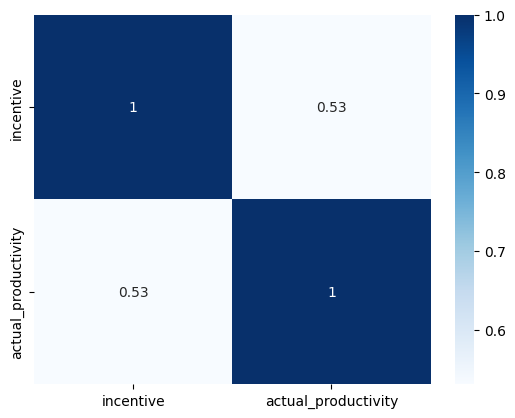

In [14]:
sns.heatmap(correlacion_incentivo_productividad, cmap="Blues", annot=True)

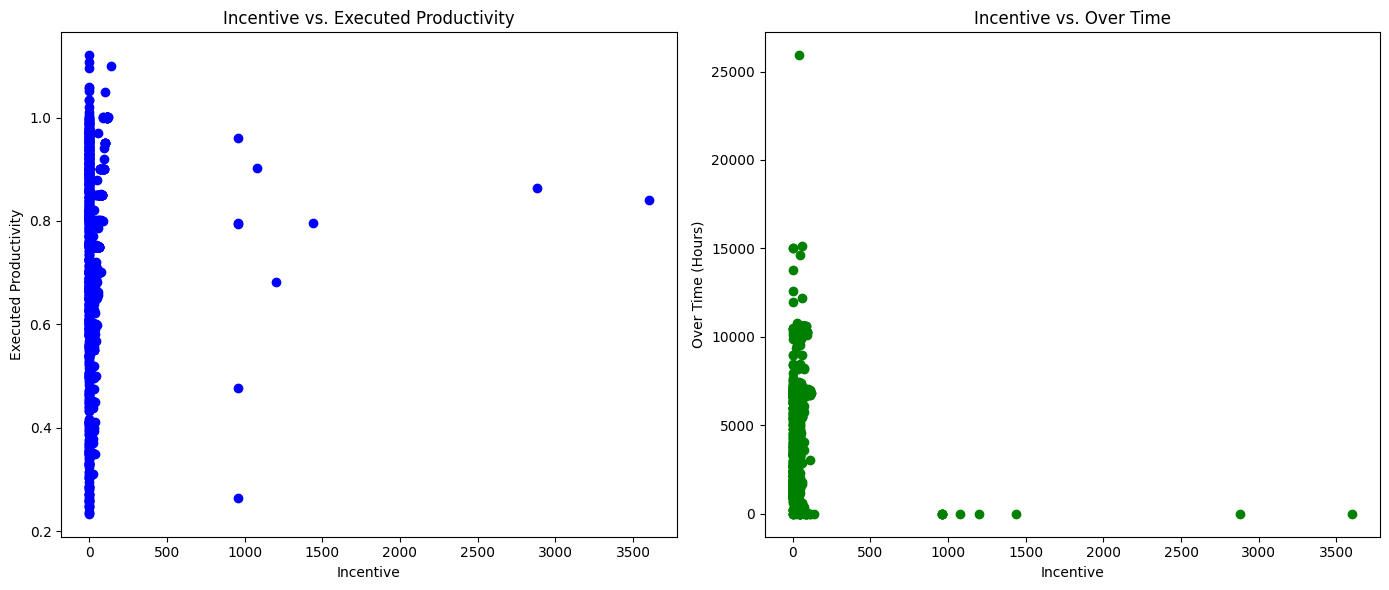

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de dispersión para incentivo vs. productividad ejecutada
axs[0].scatter(df['incentive'], df['actual_productivity'], color='blue')
axs[0].set_title('Incentive vs. Executed Productivity')
axs[0].set_xlabel('Incentive')
axs[0].set_ylabel('Executed Productivity')

# Gráfico de dispersión para incentivo vs. tiempo de producción (Over Time)
axs[1].scatter(df['incentive'], df['over_time'], color='green')
axs[1].set_title('Incentive vs. Over Time')
axs[1].set_xlabel('Incentive')
axs[1].set_ylabel('Over Time (Hours)')

plt.tight_layout()
plt.show()


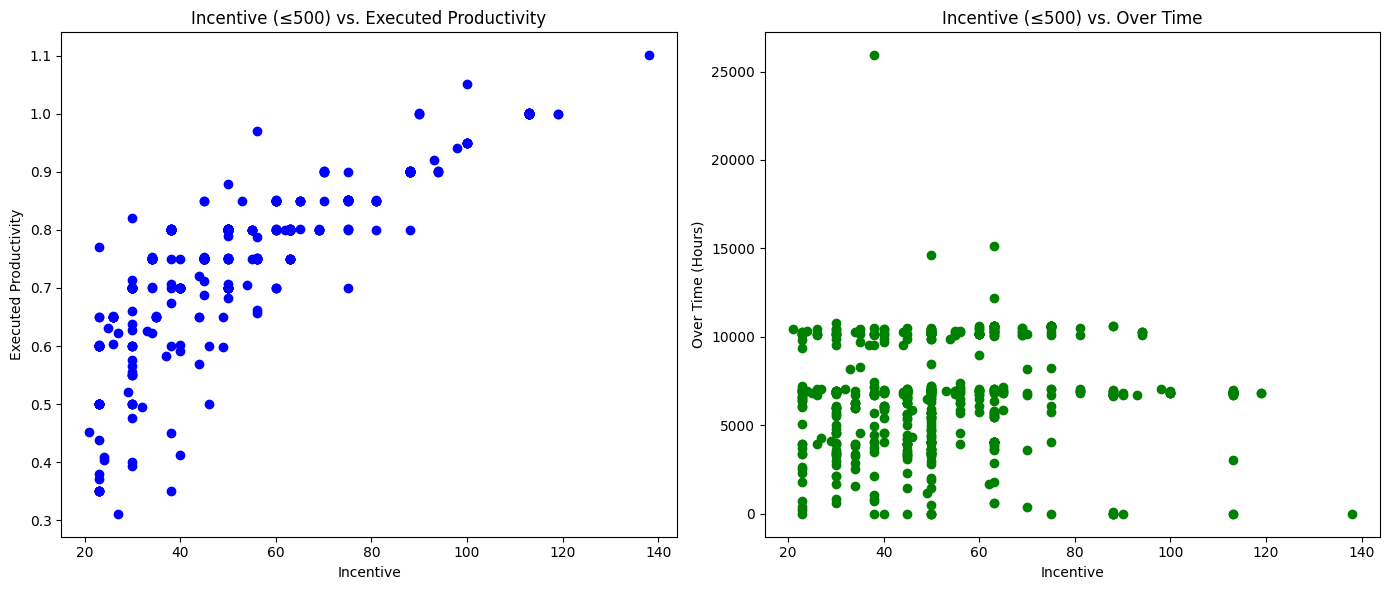

(                     incentive  actual_productivity
 incentive             1.000000             0.808375
 actual_productivity   0.808375             1.000000,
            incentive  over_time
 incentive   1.000000   0.071872
 over_time   0.071872   1.000000)

In [21]:
# Filtrar el DataFrame para excluir valores de incentivos mayores a 500
df_filtrado = df[(df['incentive'] <= 500) & (df['incentive'] > 0)]

# Calcular nuevamente las correlaciones específicas para incentivo con productividad ejecutada y tiempo de producción
correlacion_incentivo_productividad_filtrado = df_filtrado[['incentive', 'actual_productivity']].corr()
correlacion_incentivo_overtime_filtrado = df_filtrado[['incentive', 'over_time']].corr()

# Crear nuevamente los gráficos de dispersión para incentivo vs. productividad ejecutada y vs. tiempo de producción
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de dispersión para incentivo (filtrado) vs. productividad ejecutada
axs[0].scatter(df_filtrado['incentive'], df_filtrado['actual_productivity'], color='blue')
axs[0].set_title('Incentive (≤500) vs. Executed Productivity')
axs[0].set_xlabel('Incentive')
axs[0].set_ylabel('Executed Productivity')

# Gráfico de dispersión para incentivo (filtrado) vs. tiempo de producción (Over Time)
axs[1].scatter(df_filtrado['incentive'], df_filtrado['over_time'], color='green')
axs[1].set_title('Incentive (≤500) vs. Over Time')
axs[1].set_xlabel('Incentive')
axs[1].set_ylabel('Over Time (Hours)')

plt.tight_layout()
plt.show()

correlacion_incentivo_productividad_filtrado, correlacion_incentivo_overtime_filtrado
